# Proposed Day

In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import os
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import random
import time
import TrainerVTS_V08F3 as TP
import DataSetting_v5 as DS

In [2]:
gpu = 5
date = '20240915'
name = f'{date}_Day'
data_path = ['../dataset/Door_EXP/A308T',
             '../dataset/Door_EXP/A308']
level = 'day'

data_organizer = DS.DataOrganizer(name, data_path, level)
data_organizer.load()

Cross validation plan at day level
Loading ../dataset/Door_EXP/A308T...

Loaded 20240731_134433-rimg.npy of shape (28306, 128, 226)
Loaded 0731D10-csi.npy of shape (1005807, 30, 3)
Loaded 0731D30-csi.npy of shape (1329770, 30, 3)
Loaded 0731D40-csi.npy of shape (911972, 30, 3)
Loaded 20240731_153350-rimg.npy of shape (10677, 128, 226)
Loaded 20240731_150445-rimg.npy of shape (17782, 128, 226)
Loaded 20240731_152721-rimg.npy of shape (6990, 128, 226)
Loaded 20240731_141803-rimg.npy of shape (7837, 128, 226)
Loaded 20240731_142508-rimg.npy of shape (12481, 128, 226)
Loaded 20240731_144845-rimg.npy of shape (12075, 128, 226)
Loaded 20240731_145305-rimg.npy of shape (15562, 128, 226)
Loaded 20240731_153002-rimg.npy of shape (10578, 128, 226)
Loaded 20240731_154828-rimg.npy of shape (12645, 128, 226)
Loaded 20240731_134148-rimg.npy of shape (17875, 128, 226)
Loaded 20240731_145901-rimg.npy of shape (15458, 128, 226)
Loaded 20240731_153744-rimg.npy of shape (13863, 128, 226)
Loaded 20240731_

In [3]:
print(data_organizer.total_segment_labels)

         env      subject              bag      csi  group  segment  \
0      A308T         chen  20240731_154527  0731D50    0.0      0.0   
1      A308T         chen  20240731_154527  0731D50    0.0      0.0   
2      A308T         chen  20240731_154527  0731D50    0.0      0.0   
3      A308T         chen  20240731_154828  0731D50    2.0      0.0   
4      A308T         chen  20240731_154527  0731D50    0.0      0.0   
...      ...          ...              ...      ...    ...      ...   
93481   A308  higashinaka  20240716_155647  0716D02    7.0     19.0   
93482   A308  higashinaka  20240716_155647  0716D02    7.0     19.0   
93483   A308  higashinaka  20240716_155647  0716D02    7.0     19.0   
93484   A308  higashinaka  20240716_155647  0716D02    7.0     19.0   
93485   A308  higashinaka  20240716_155647  0716D02    7.0     19.0   

           timestamp img_inds csi_inds  Unnamed: 0  
0      1722408333343       98     8093     45064.0  
1      1722408333510      102     8260   

### Teacher

In [6]:
# data_organizer.batch_size = 1
preprocess = DS.Preprocess(new_size=(128, 128))

torch.cuda.set_device(gpu)
#data_organizer.gen_plan(subset_ratio=0.2, save=True)
data_organizer.load_plan('../dataset/Door_EXP/day_r0.2.pkl')

Loaded plan!


Generating loaders for t: level = day, current test = A308
 Train dataset length = 8682
 Test dataset length = 10014
 Exported train loader of len 108, batch size = 64
 Exported valid loader of len 27, batch size = 64
 Exported test loader of len 10014, batch size = 1

==========20240915_Day_A308 Teacher Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:01<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 300...

Total training time: 24321.56667780876 sec


<Figure size 432x288 with 0 Axes>

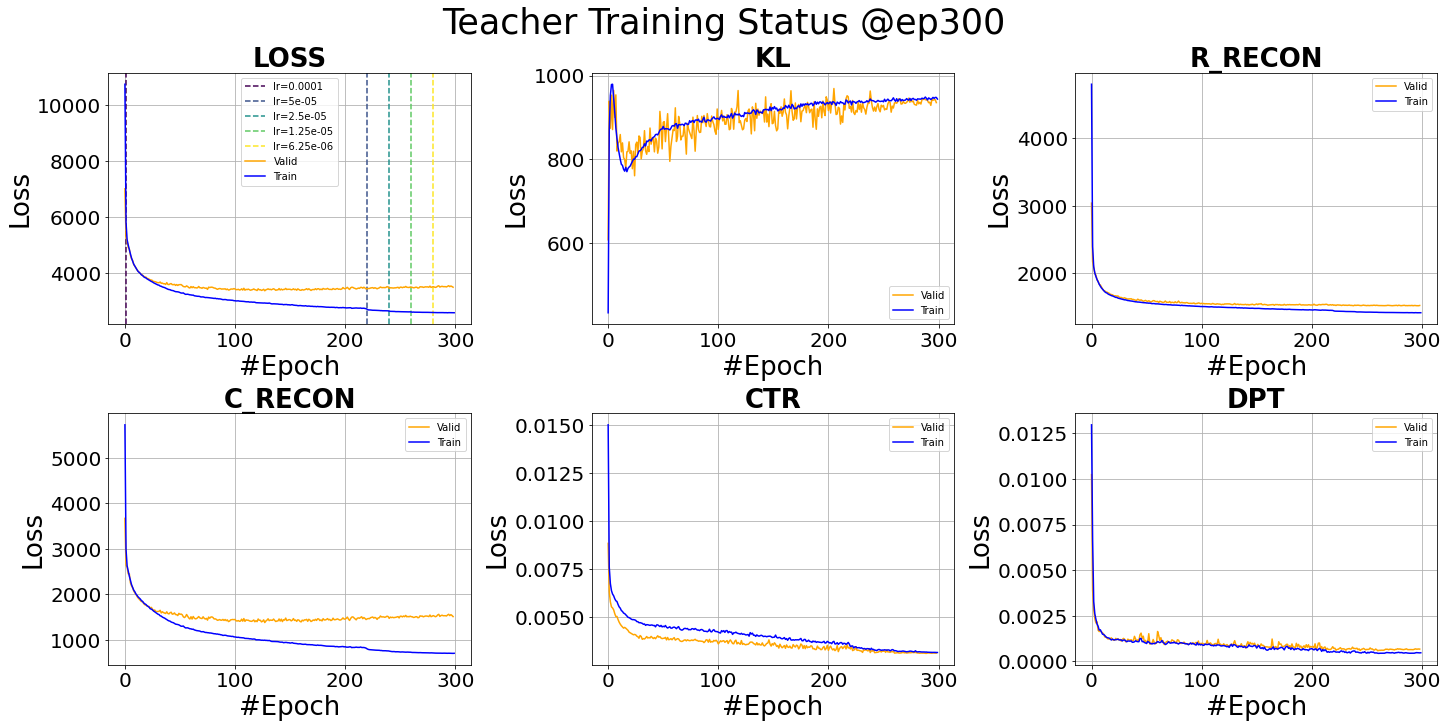

==========20240915_Day_A308 Teacher Test starting==========



  0%|          |[00:00<?]

/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Test finished. Average loss={'LOSS': 2120.825818474646, 'KL': 14.94375317281595, 'R_RECON': 1416.0368677477043, 'C_RECON': 697.3135229768576, 'CTR': 0.0031421784568720235, 'DPT': 0.0004375061363392021}

Total training time: 58.688122272491455 sec


<Figure size 1440x720 with 0 Axes>

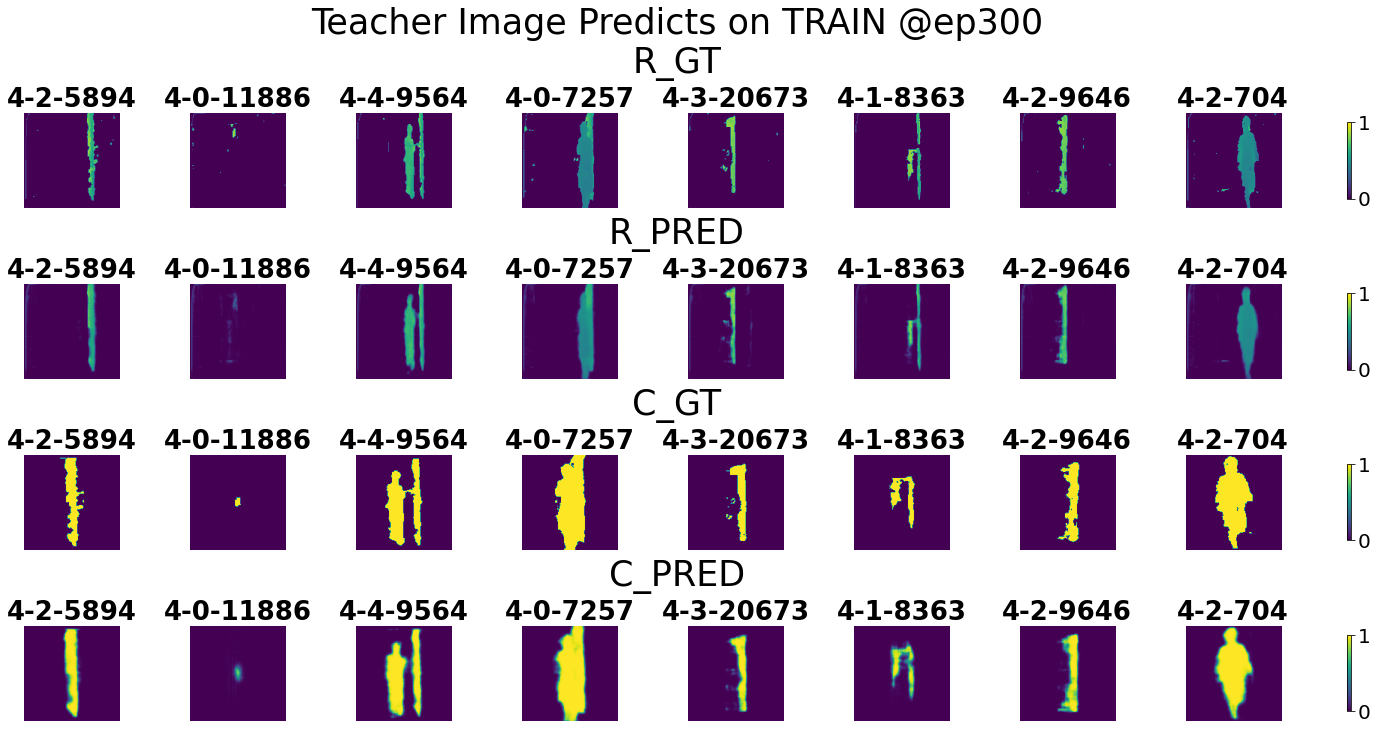

<Figure size 1440x720 with 0 Axes>

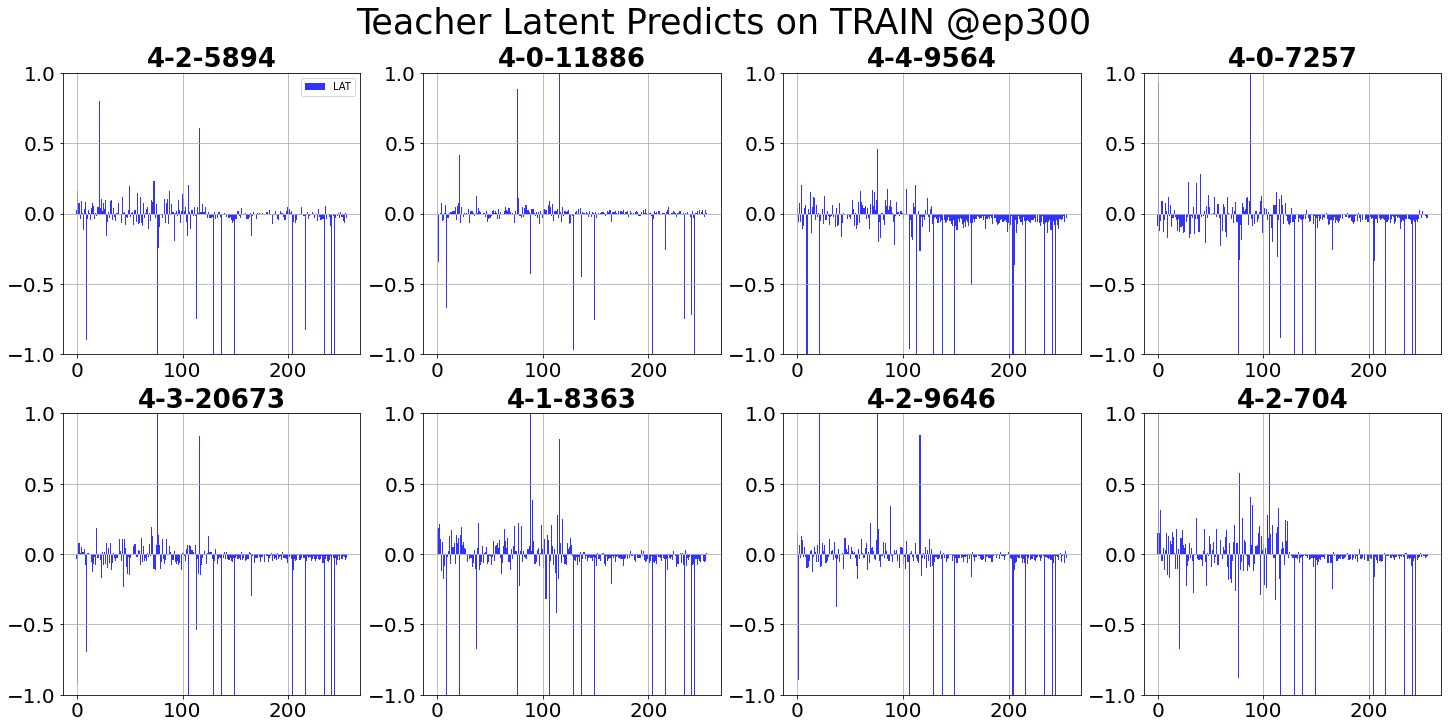

<Figure size 1440x720 with 0 Axes>

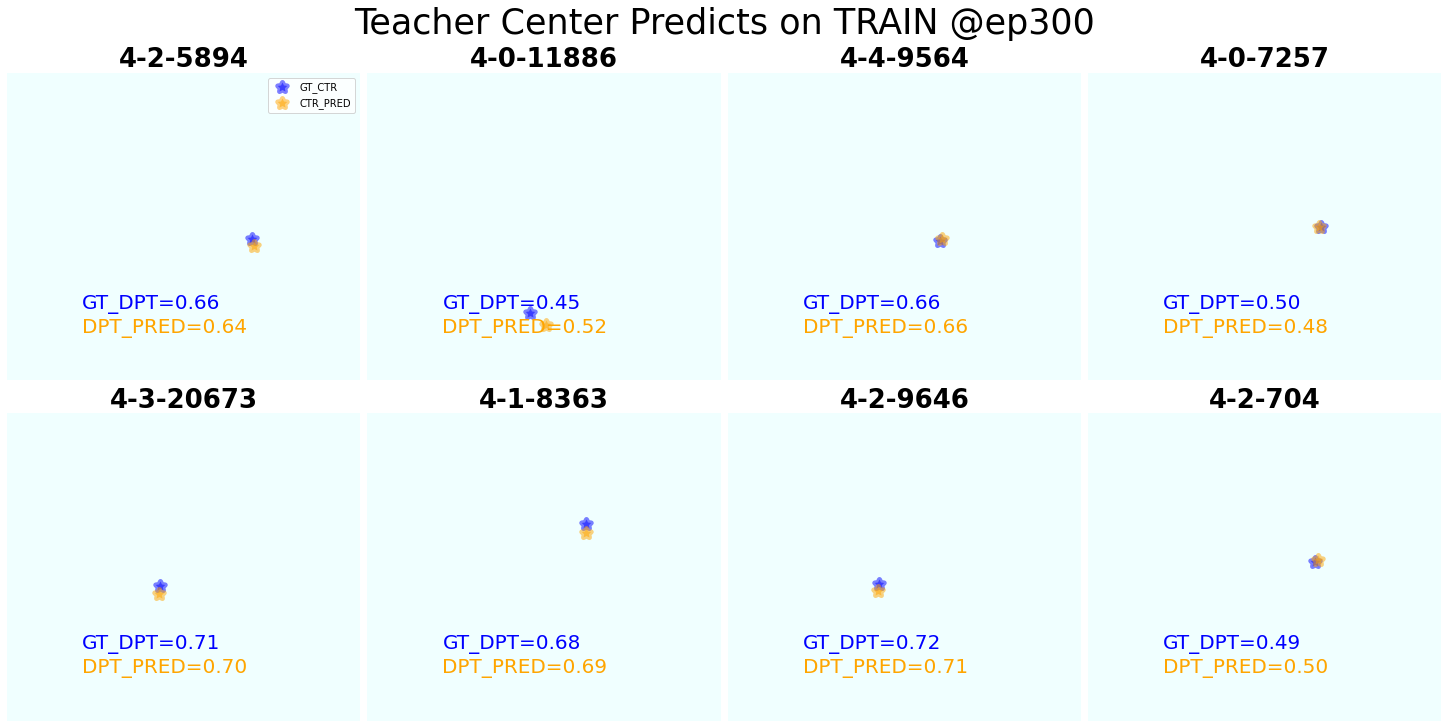

==========20240915_Day_A308 Teacher Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 6744.8063910857445, 'KL': 15.225772425922205, 'R_RECON': 2790.1472818082457, 'C_RECON': 3947.031685680026, 'CTR': 0.011084864150135175, 'DPT': 0.0034905026210446527}

Total training time: 129.6705515384674 sec


<Figure size 1440x720 with 0 Axes>

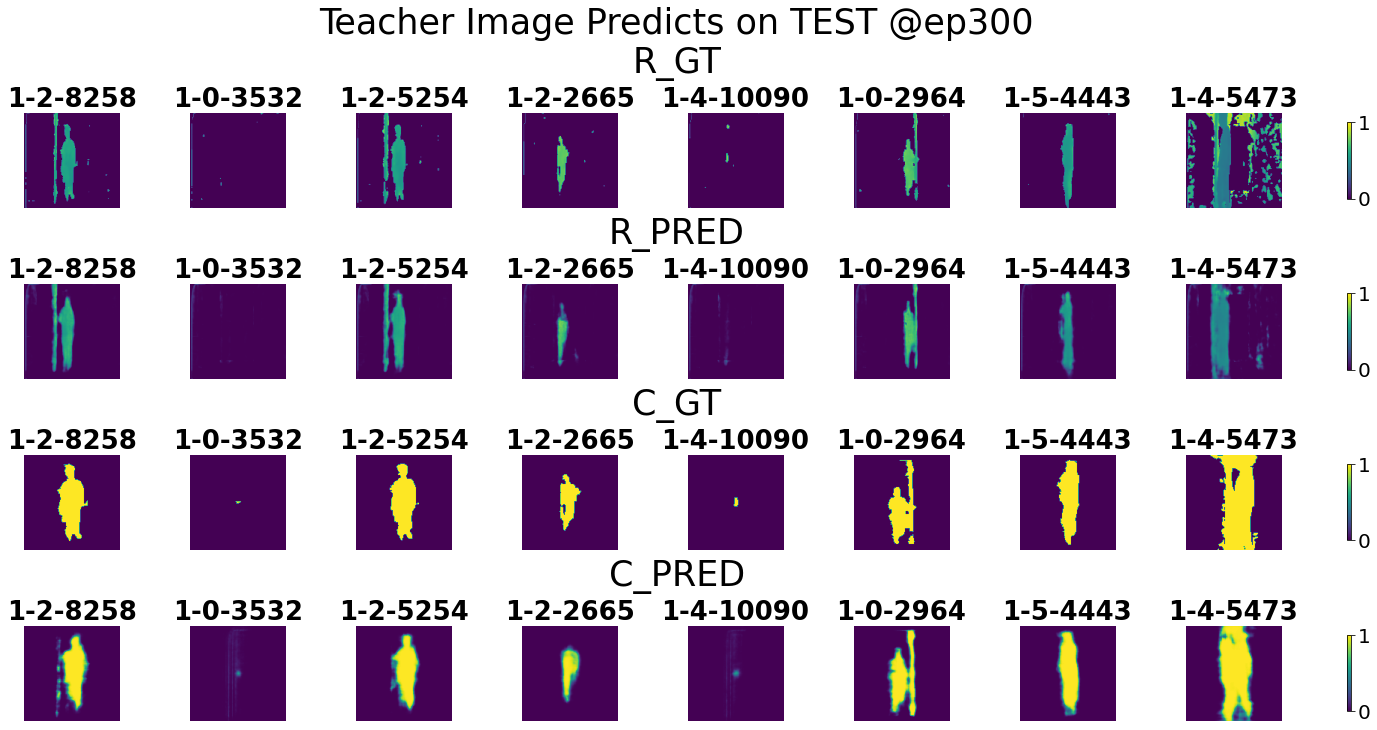

<Figure size 1440x720 with 0 Axes>

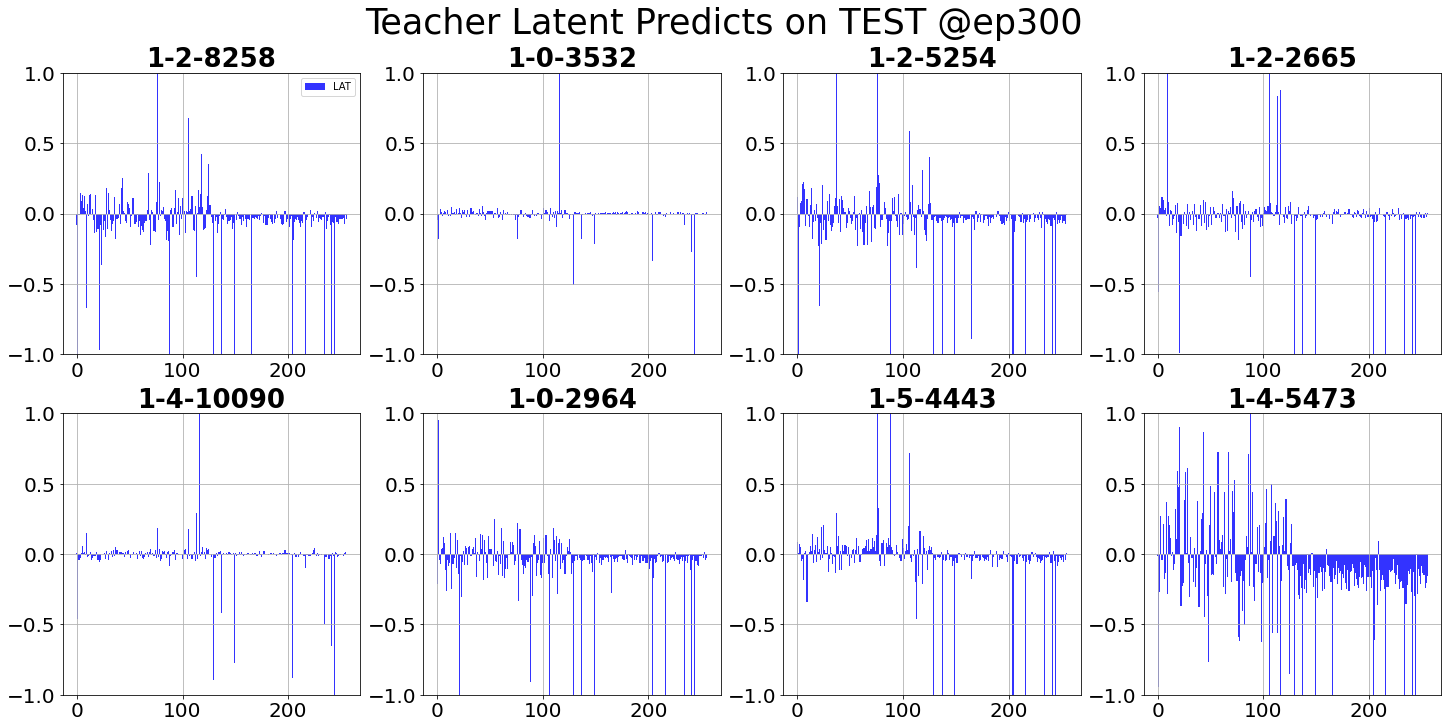

<Figure size 1440x720 with 0 Axes>

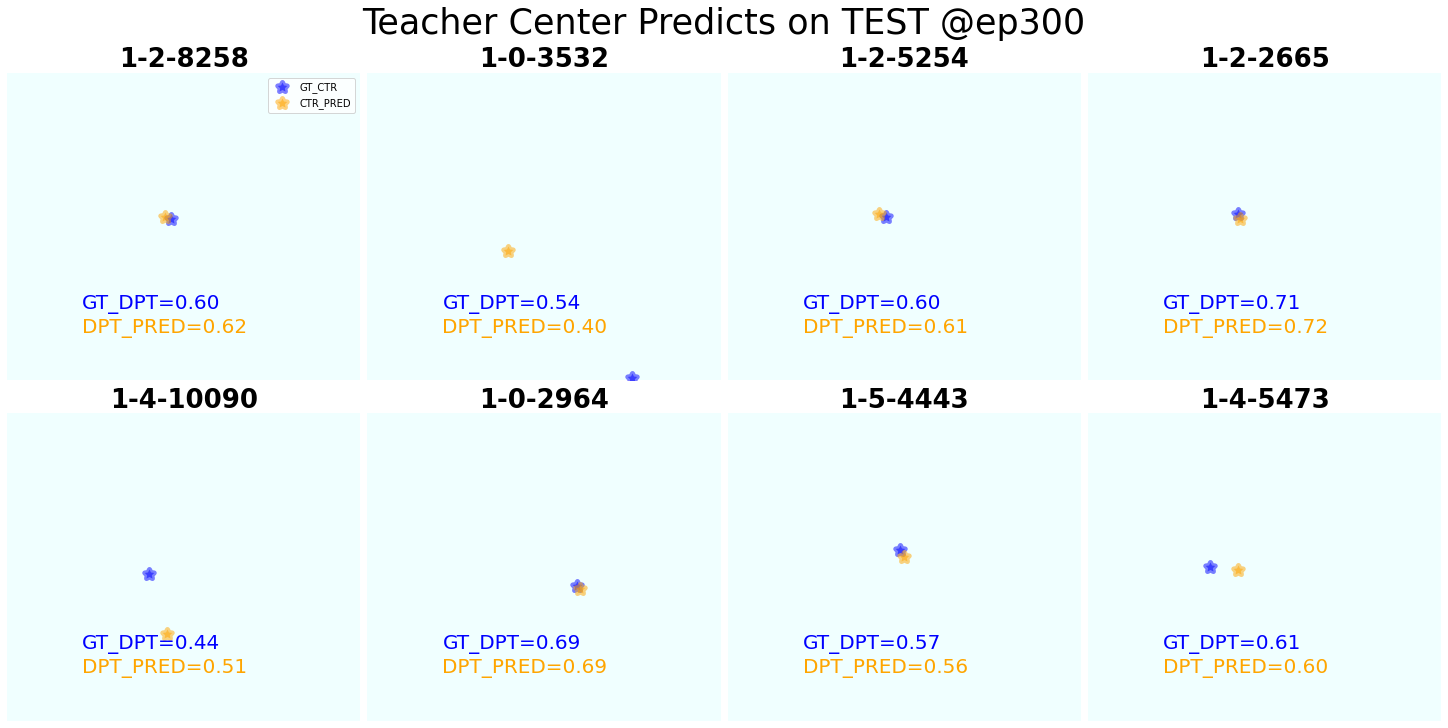

Saving preds: R_PRED...
Saving preds: C_PRED...
Saving preds: DPT_PRED...
Saving preds: CTR_PRED...
Saving preds: LAT...
Saving preds: TAG...
All saved!

Teacher schedule Completed!
Generating loaders for t: level = day, current test = A308
 Train dataset length = 8682
 Test dataset length = 10014
 Exported train loader of len 108, batch size = 64
 Exported valid loader of len 27, batch size = 64
 Exported test loader of len 10014, batch size = 1

==========20240915_Day_A308 Teacher Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 300...

Total training time: 24561.802116394043 sec


<Figure size 1440x720 with 0 Axes>

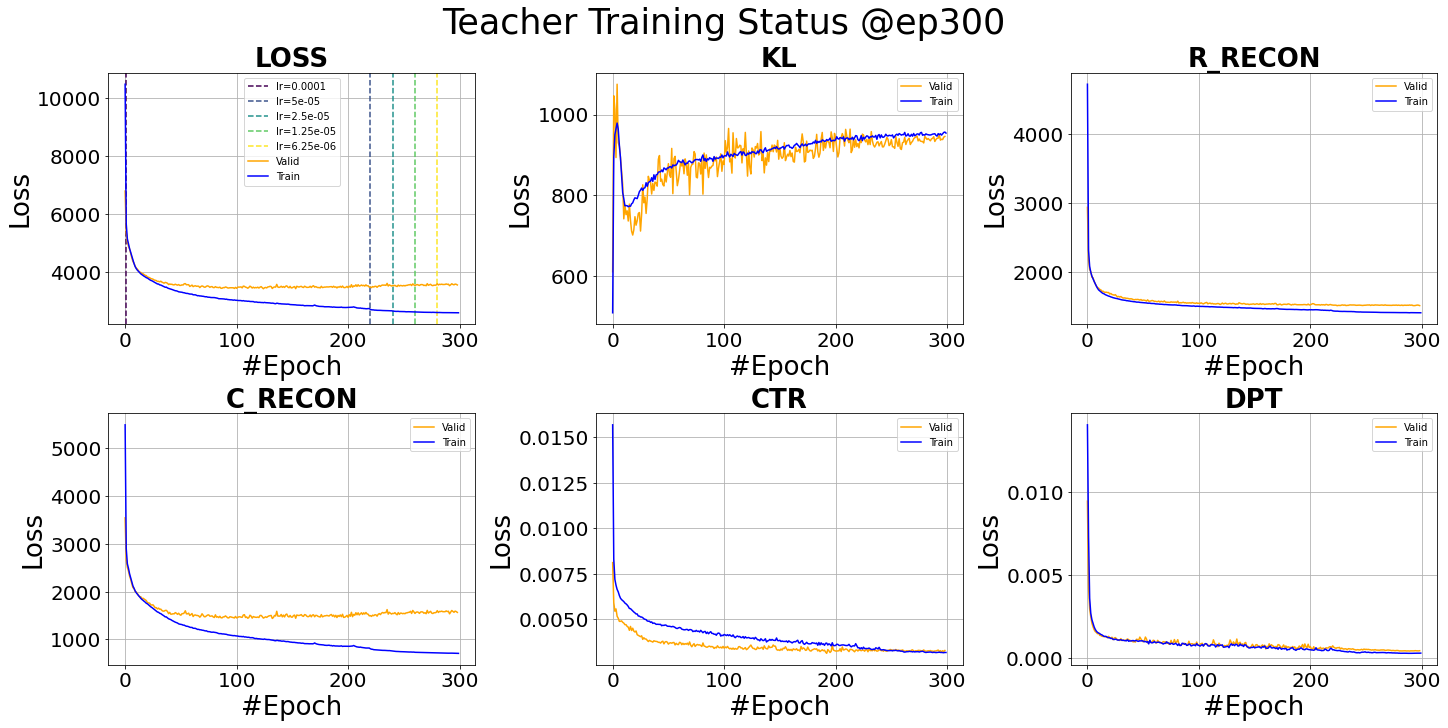

==========20240915_Day_A308 Teacher Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 2131.05253581206, 'KL': 14.899520769853282, 'R_RECON': 1415.206843983244, 'C_RECON': 708.3924931044932, 'CTR': 0.003159644393425515, 'DPT': 0.00030766018149477073}

Total training time: 62.45951557159424 sec


<Figure size 1440x720 with 0 Axes>

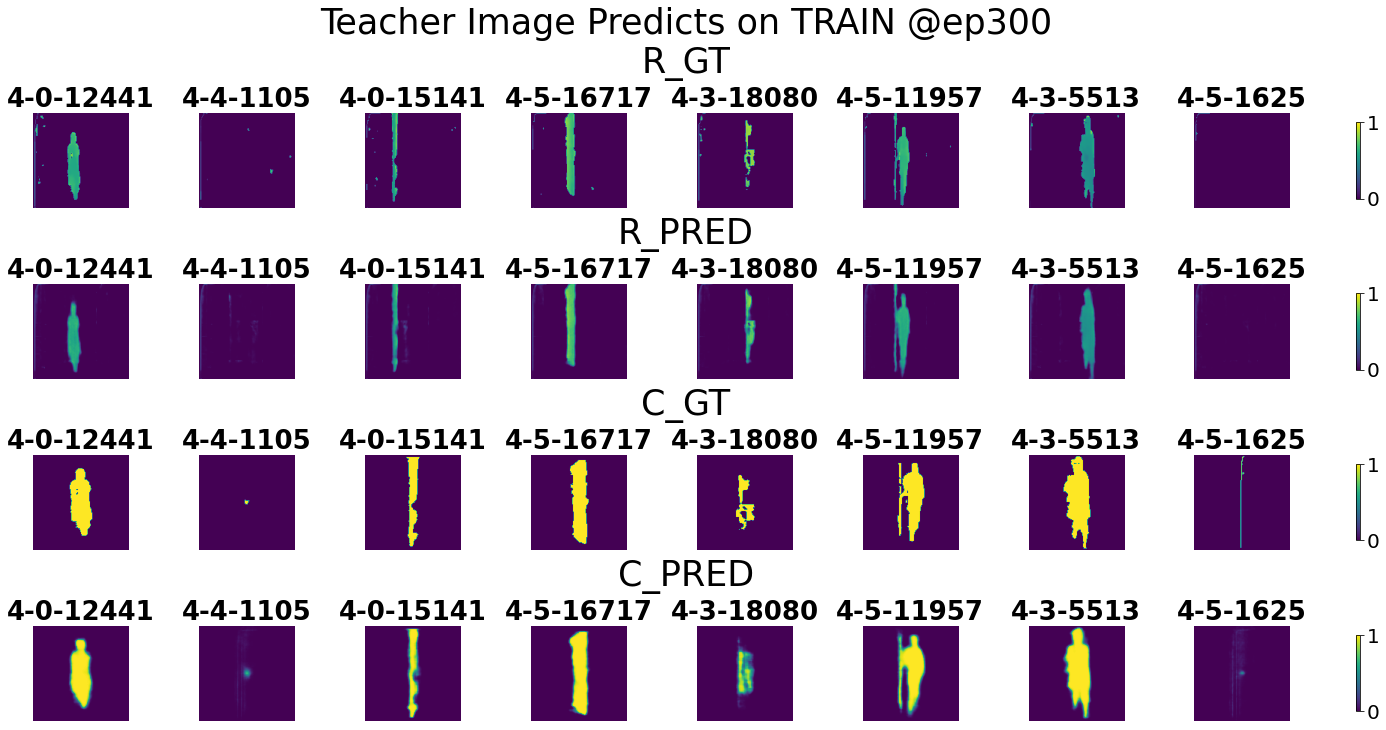

<Figure size 1440x720 with 0 Axes>

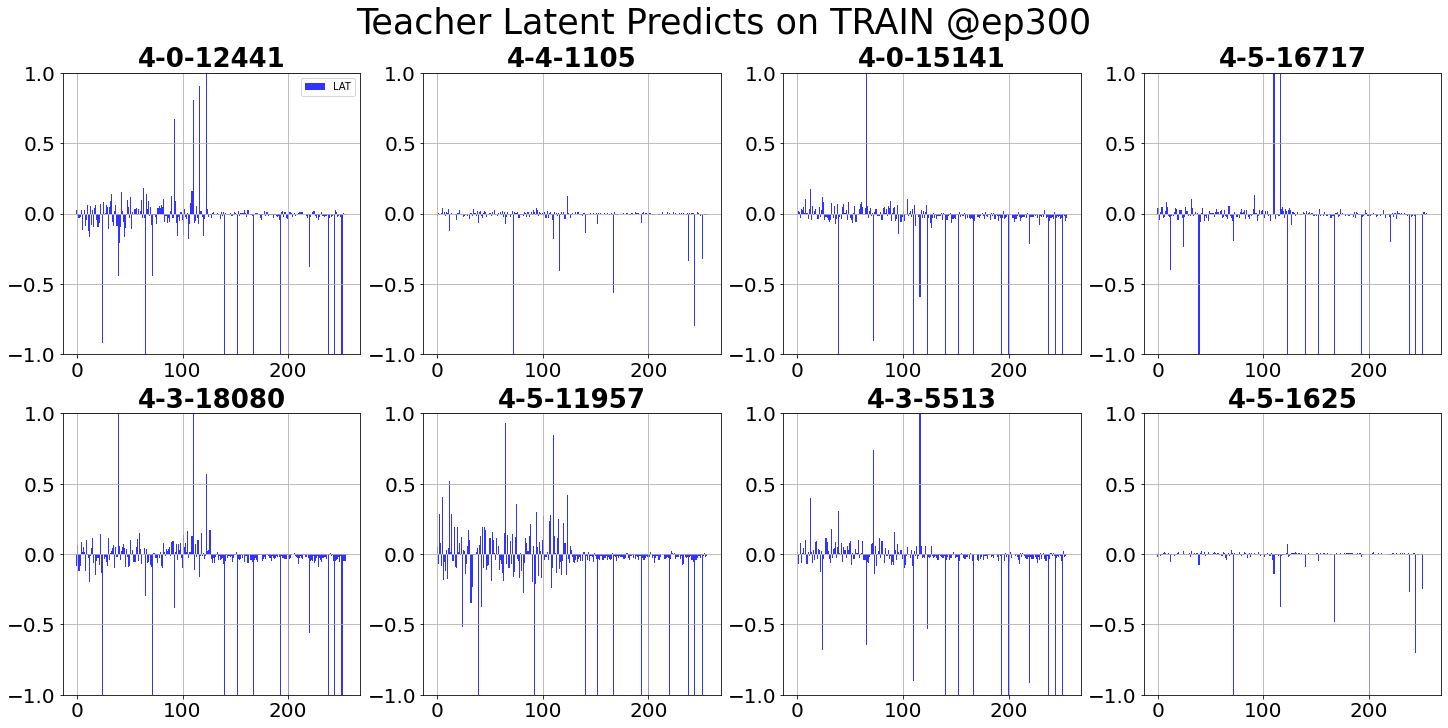

<Figure size 1440x720 with 0 Axes>

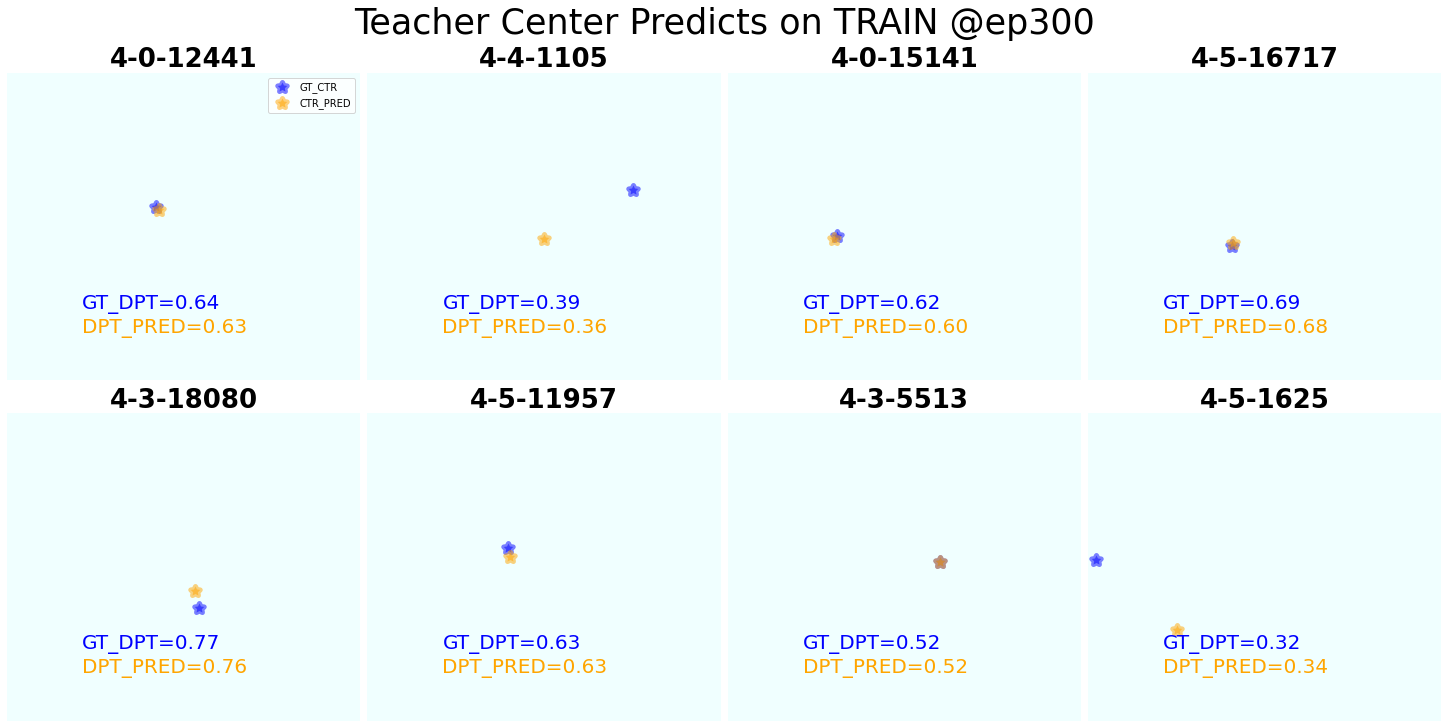

==========20240915_Day_A308 Teacher Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 6336.650235388839, 'KL': 15.43093566304556, 'R_RECON': 2642.637322574598, 'C_RECON': 3686.285242782373, 'CTR': 0.008726306784978998, 'DPT': 0.0035079816470181663}

Total training time: 130.66551041603088 sec


<Figure size 1440x720 with 0 Axes>

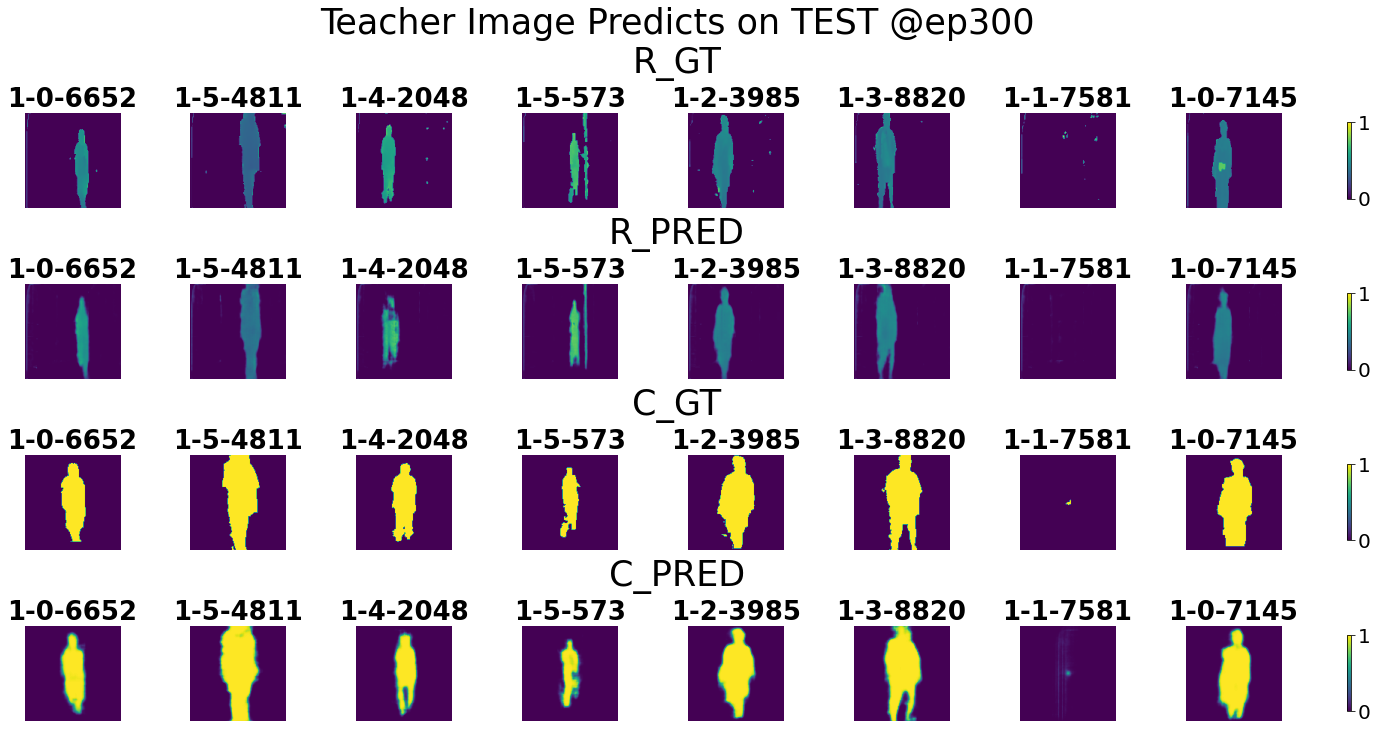

<Figure size 1440x720 with 0 Axes>

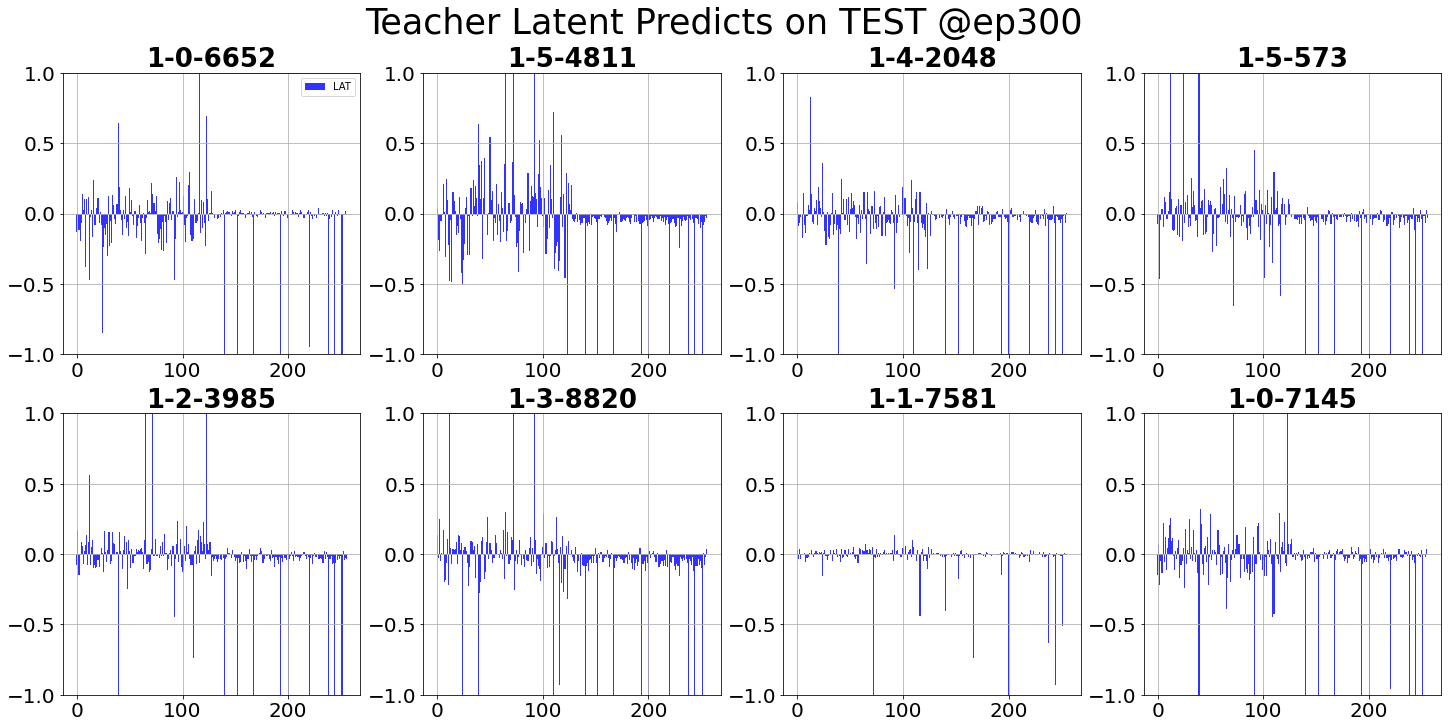

<Figure size 1440x720 with 0 Axes>

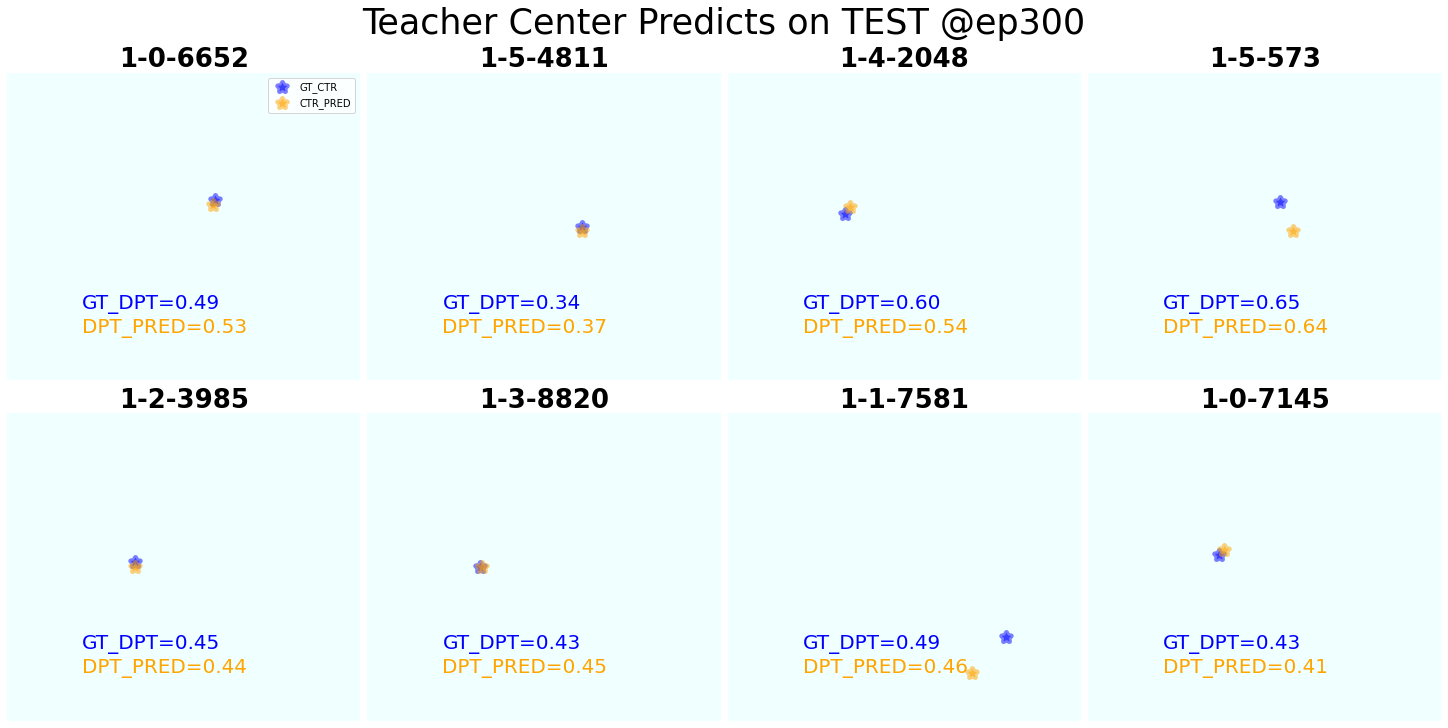

Saving preds: R_PRED...
Saving preds: C_PRED...
Saving preds: DPT_PRED...
Saving preds: CTR_PRED...
Saving preds: LAT...
Saving preds: TAG...
All saved!

Teacher schedule Completed!


In [7]:
for i in range(2):
    #data_organizer.gen_plan(subset_ratio=0.2)
    train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='t')
    if current_test == 'A308T':
        continue
    T_trainer = TP.TeacherTrainer(beta=0.5,
                              name='Teacher',
                              loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                              lr=1e-4, epochs=10, cuda=gpu,
                                  preprocess = preprocess,
                              train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                              notion=f'{name}_{current_test}')

    T_trained = T_trainer.schedule(lr_decay=True)

### Student

Generating loaders for s: level = day, current test = A308
 Train dataset length = 8682
 Test dataset length = 10014
 Exported train loader of len 108, batch size = 64
 Exported valid loader of len 27, batch size = 64
 Exported test loader of len 10014, batch size = 1

==========20240915_Day_A308 Student Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 367...

Total training time: 64291.29398202896 sec


<Figure size 1440x720 with 0 Axes>

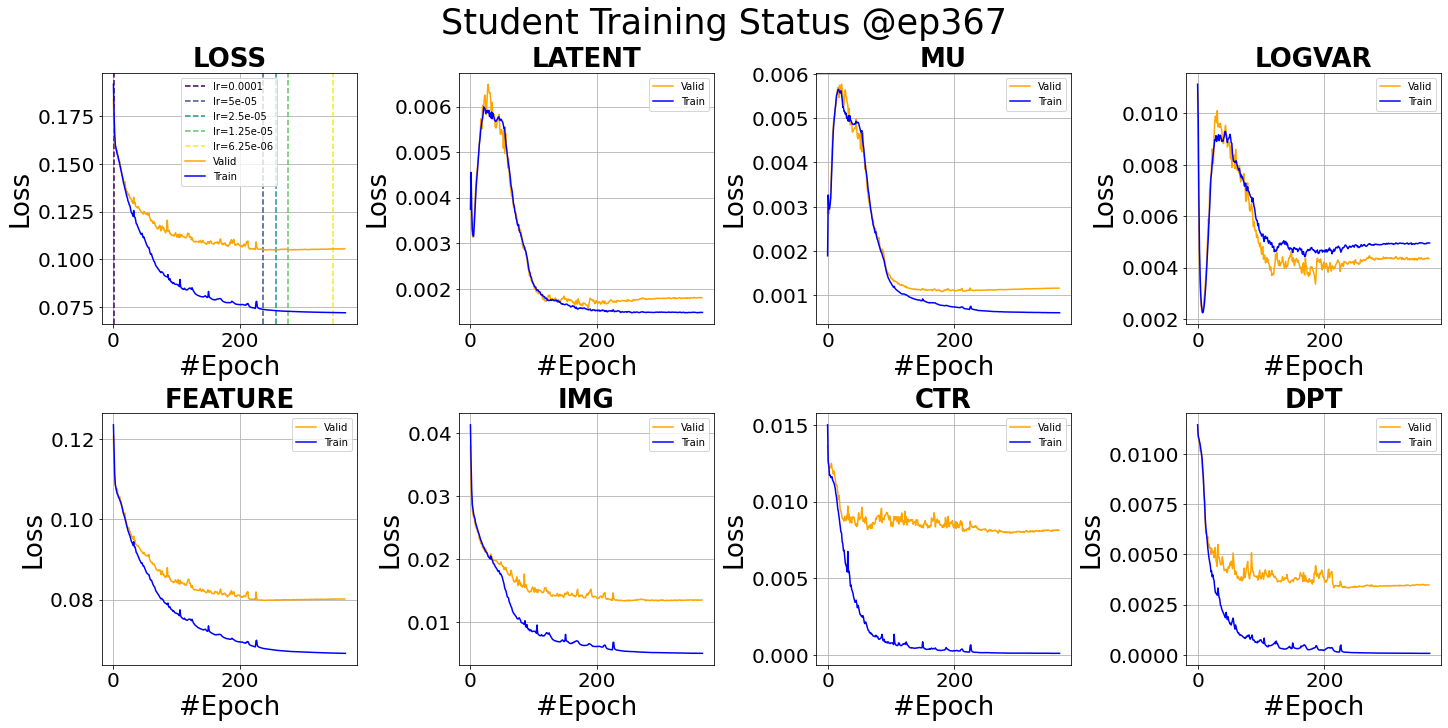

==========20240915_Day_A308 Student Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 0.08112806954563388, 'LATENT': 0.09479111280496808, 'MU': 0.03864783566421937, 'LOGVAR': 0.3193642127576755, 'FEATURE': 0.06646758509439812, 'IMG': 0.0050339407123268995, 'CTR': 9.475182398761622e-05, 'DPT': 5.268051632236646e-05}

Total training time: 240.90117144584656 sec


<Figure size 1440x720 with 0 Axes>

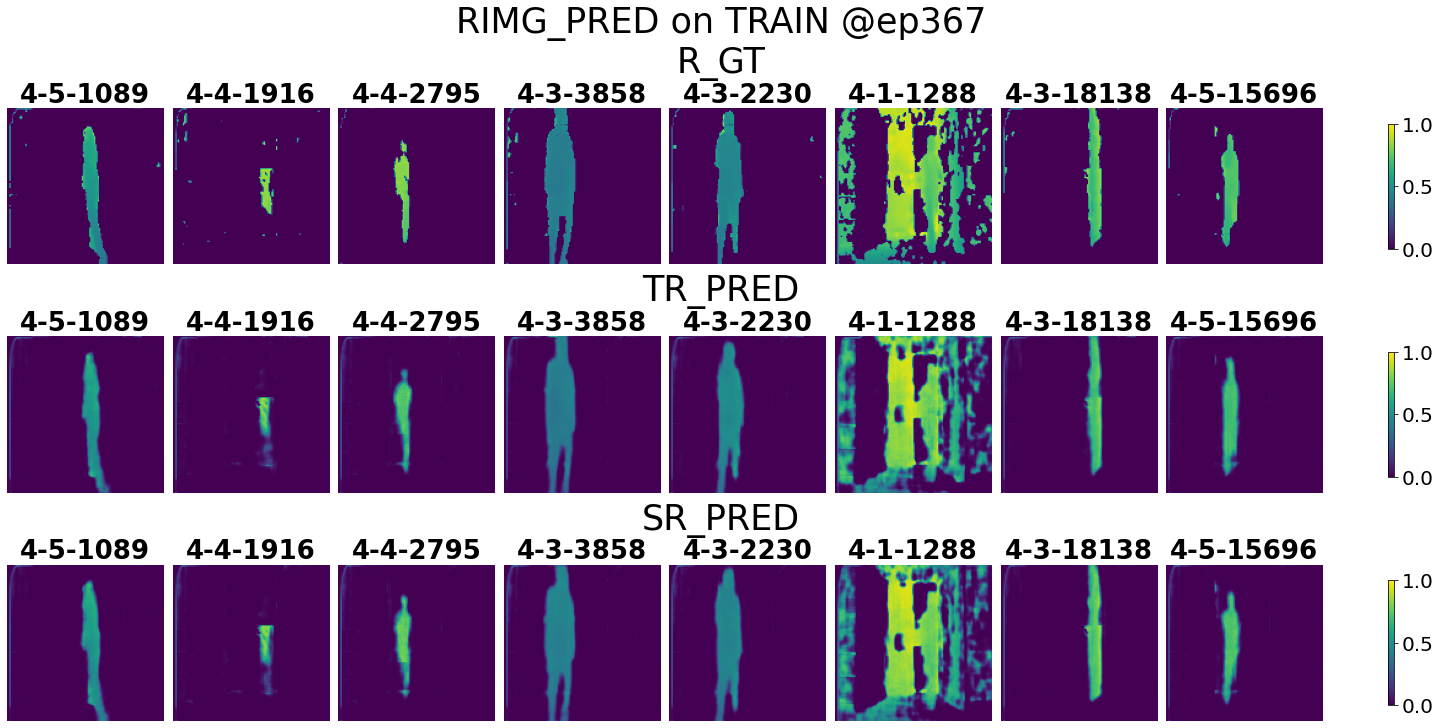

<Figure size 1440x720 with 0 Axes>

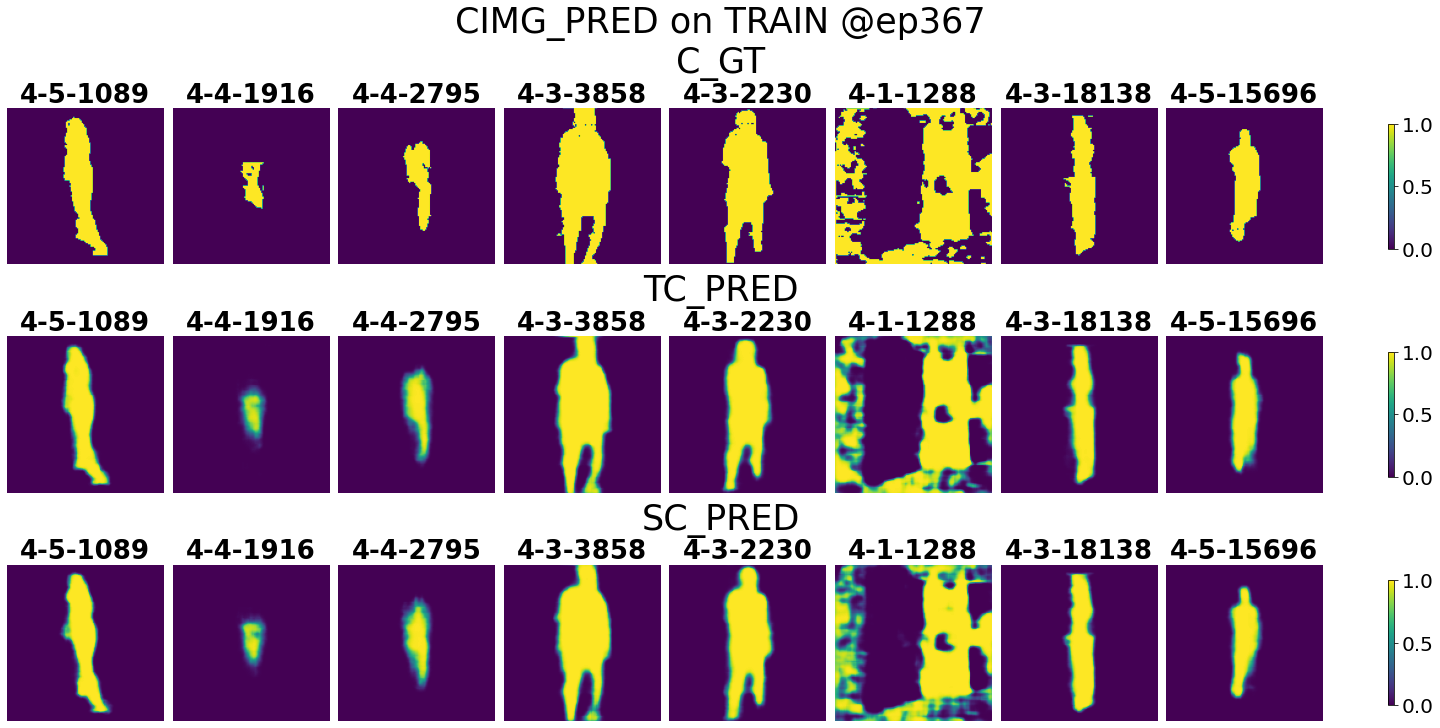

<Figure size 1440x720 with 0 Axes>

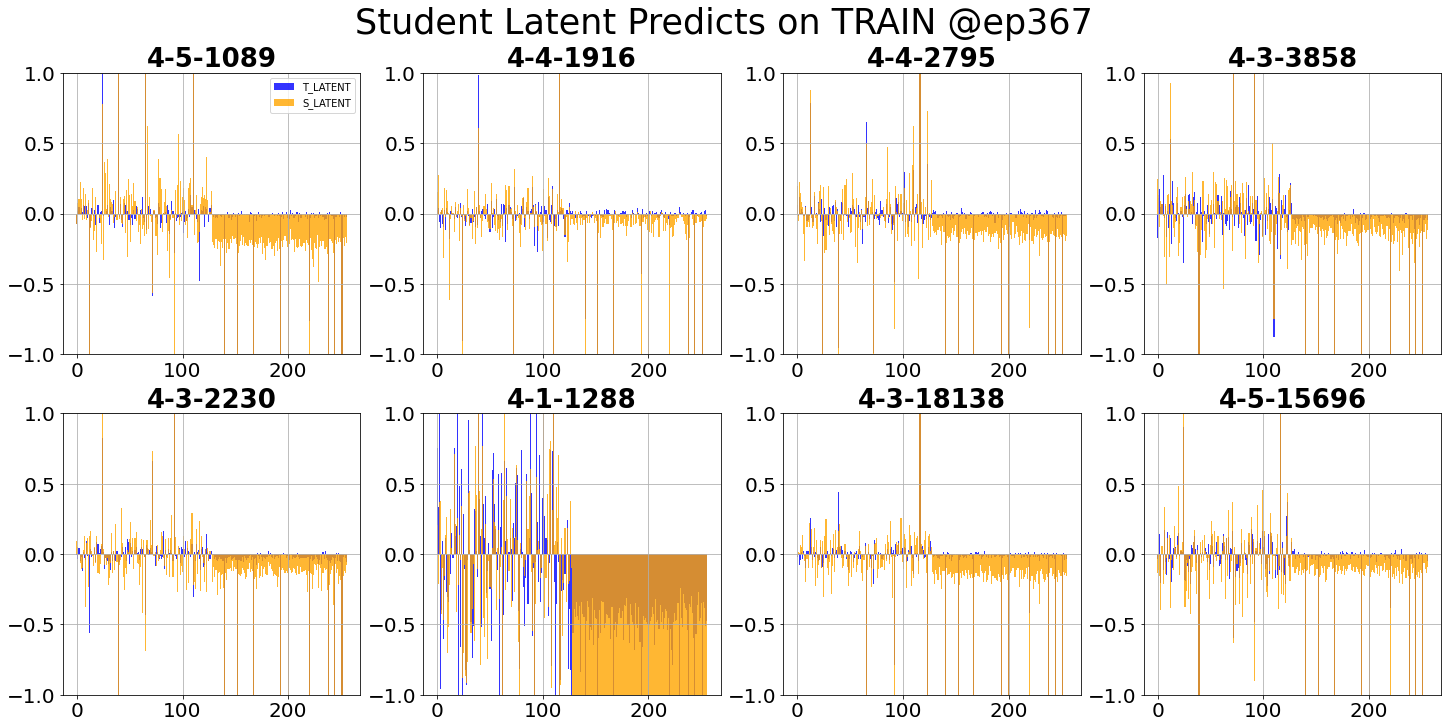

<Figure size 1440x720 with 0 Axes>

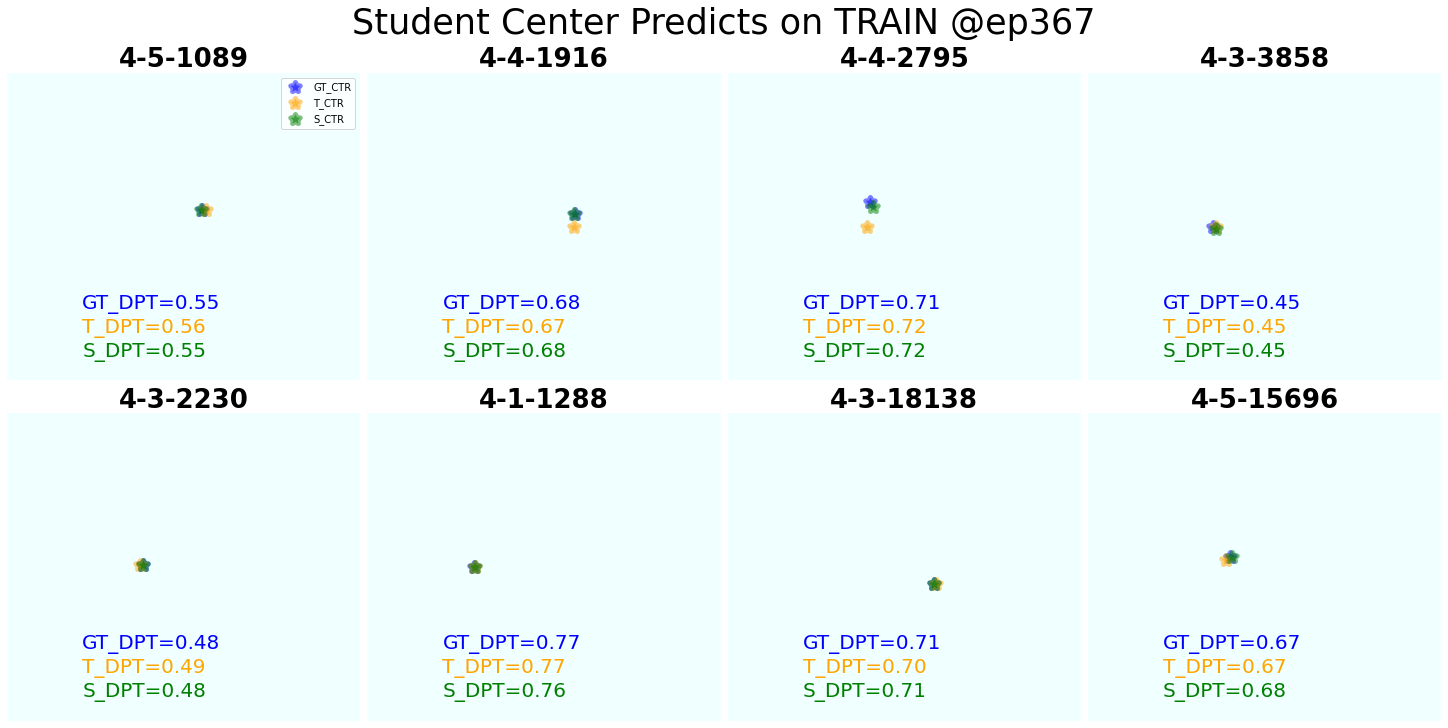

<Figure size 1440x720 with 0 Axes>

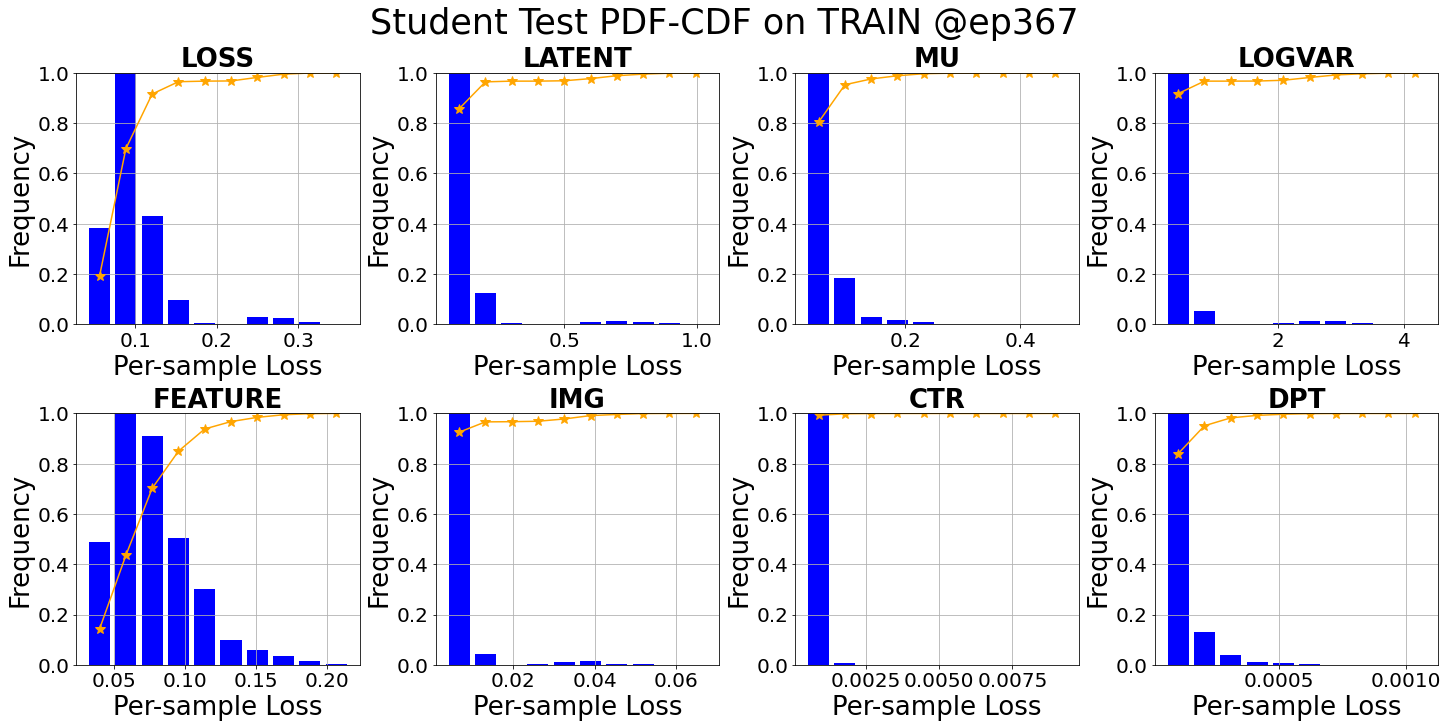

==========20240915_Day_A308 Student Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 0.25557790209587783, 'LATENT': 0.2132680847950128, 'MU': 0.18307888250627236, 'LOGVAR': 0.3340248755532381, 'FEATURE': 0.14569714223746147, 'IMG': 0.04950389583624835, 'CTR': 0.025408434457205458, 'DPT': 0.013641620675464908}

Total training time: 516.1887044906616 sec


<Figure size 1440x720 with 0 Axes>

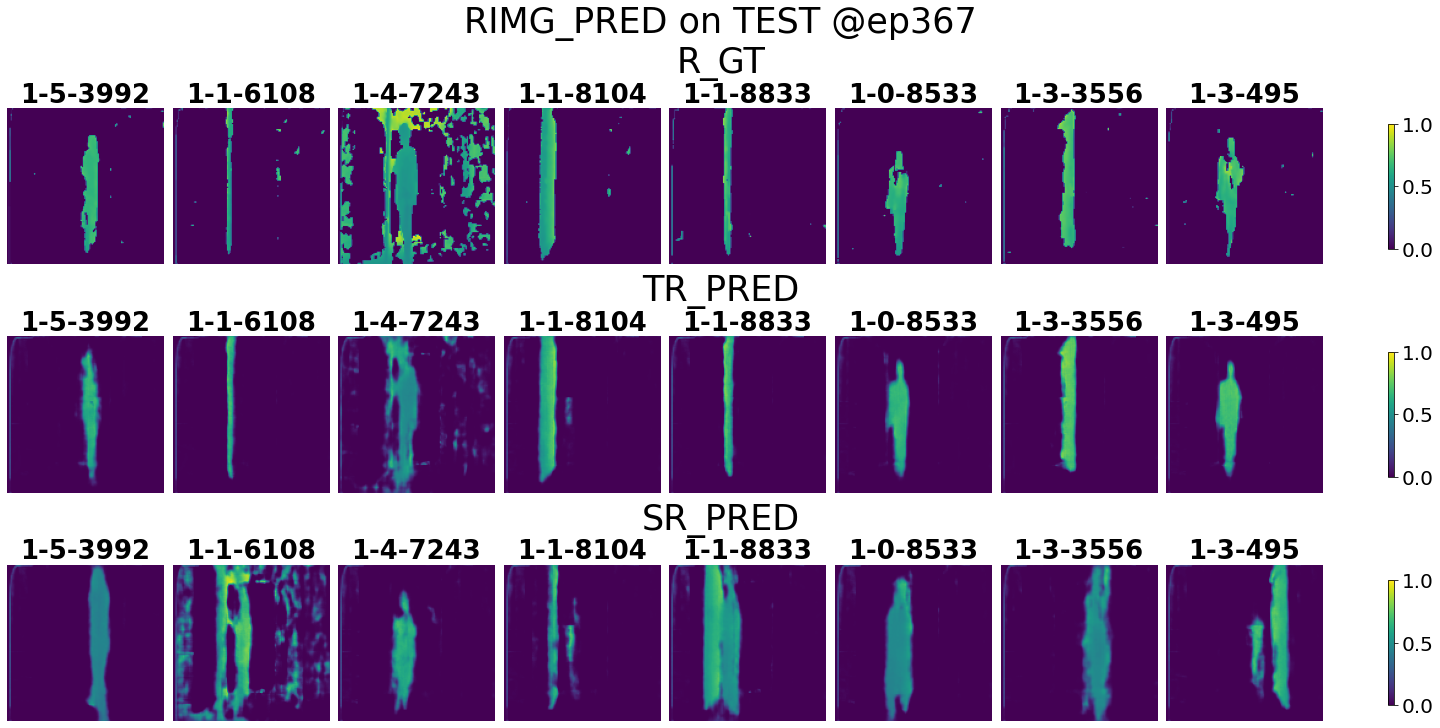

<Figure size 1440x720 with 0 Axes>

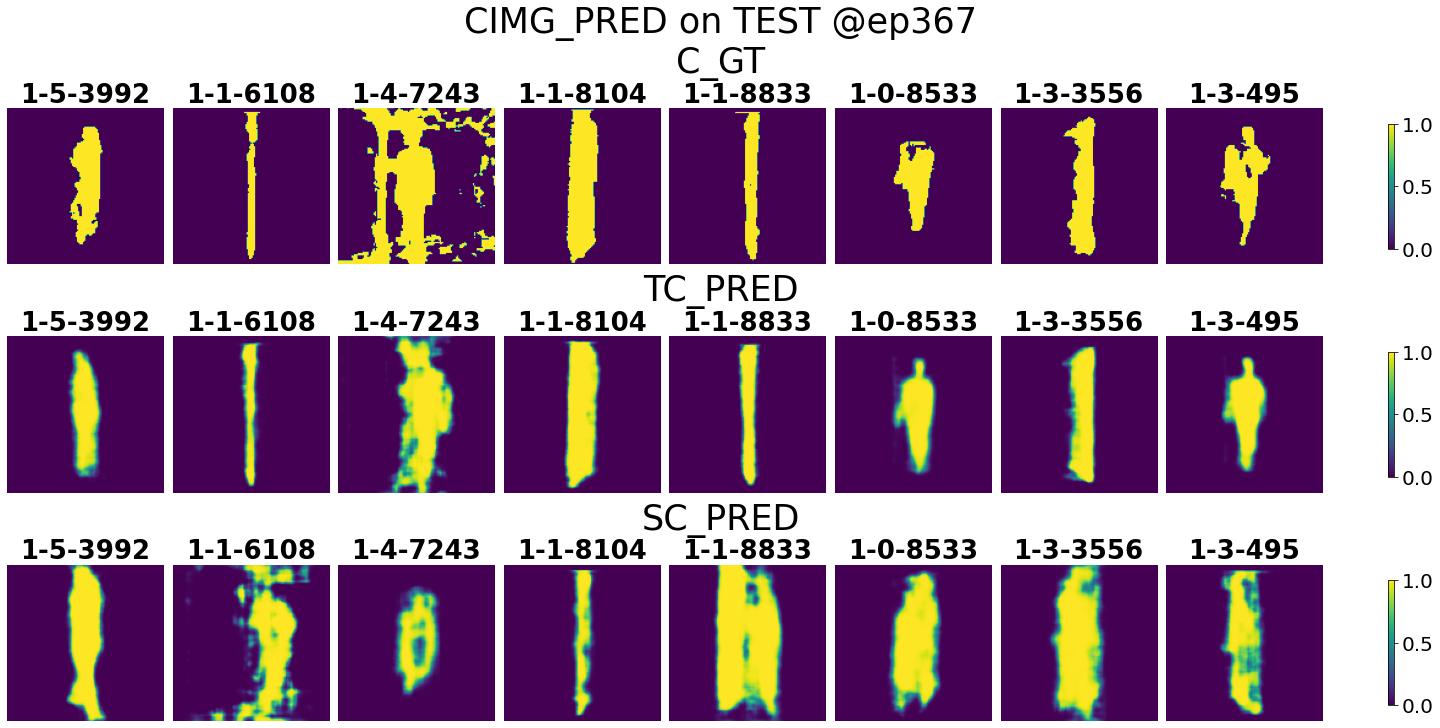

<Figure size 1440x720 with 0 Axes>

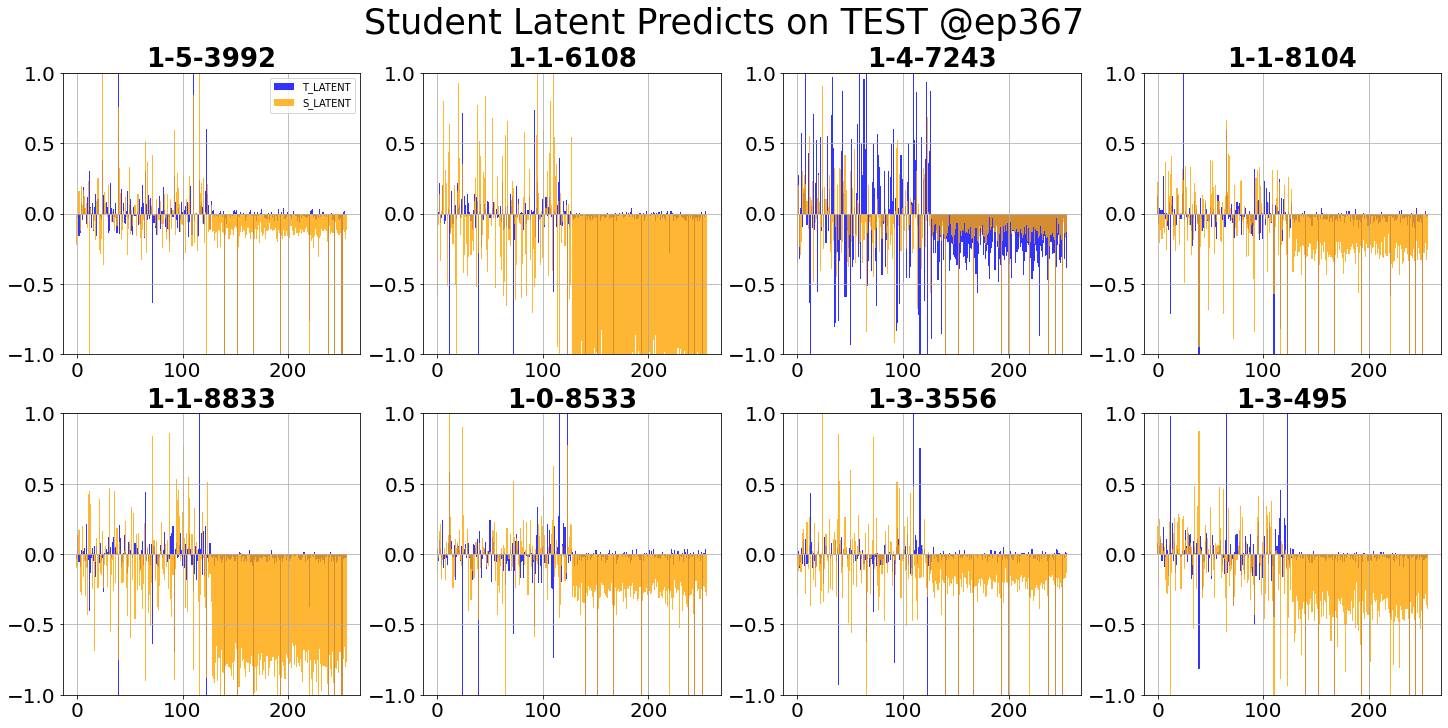

<Figure size 1440x720 with 0 Axes>

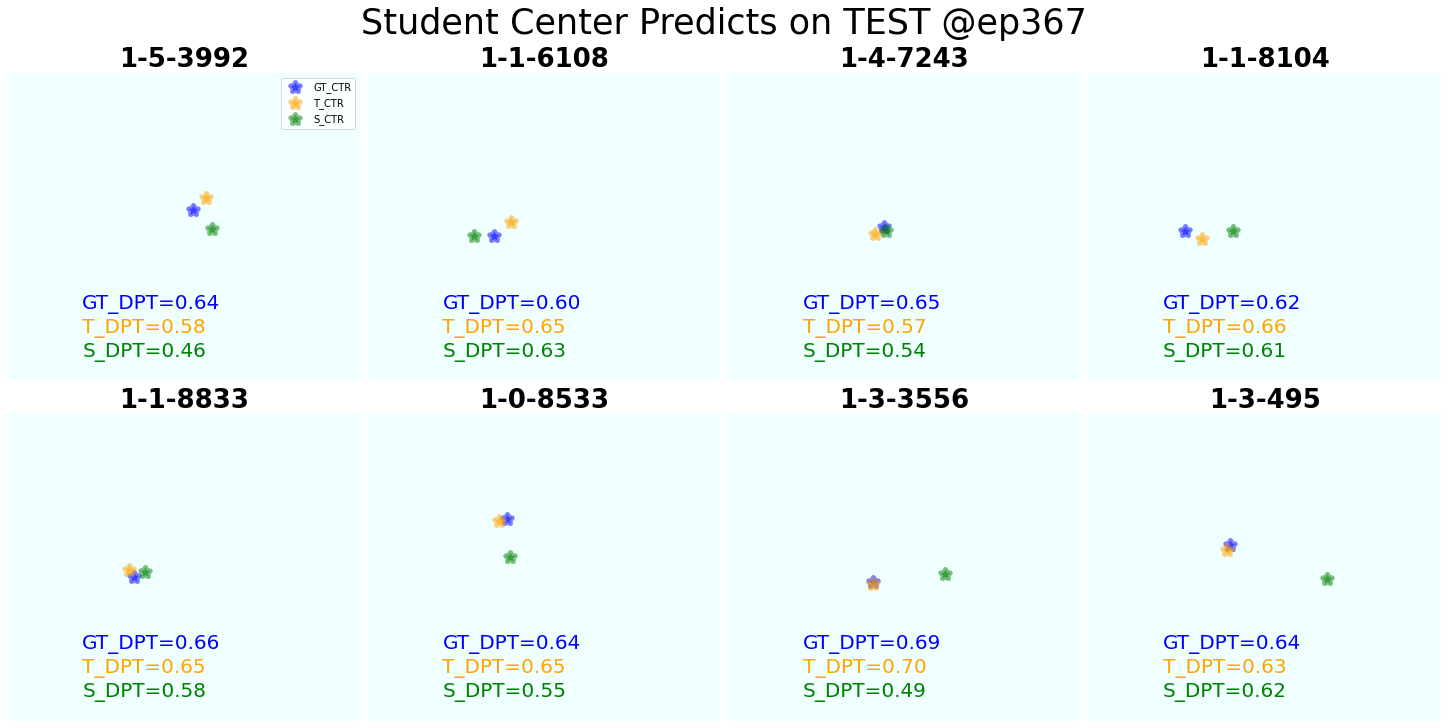

<Figure size 1440x720 with 0 Axes>

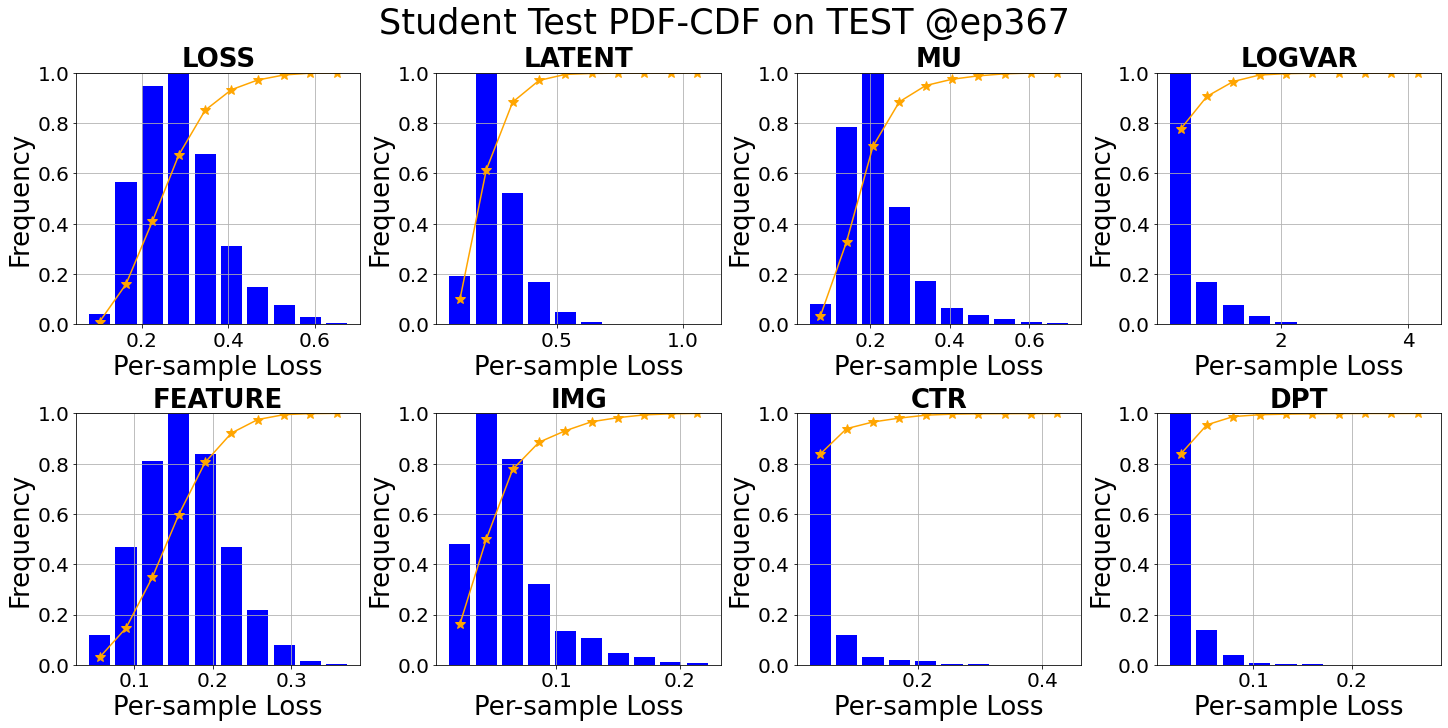

Saving preds: TR_PRED...
Saving preds: SR_PRED...
Saving preds: TC_PRED...
Saving preds: SC_PRED...
Saving preds: T_LATENT...
Saving preds: S_LATENT...
Saving preds: T_CTR...
Saving preds: T_DPT...
Saving preds: S_CTR...
Saving preds: S_DPT...
Saving preds: TAG...
All saved!

Student schedule Completed!


In [8]:
preprocess = DS.Preprocess(new_size=(128, 128))

torch.cuda.set_device(gpu)
train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='s')
assert current_test == 'A308'

S_trainer = TP.StudentTrainer(name='Student',
                              lstm_steps = 75,
                              beta=0.5,
                              loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                              lr=1e-4, epochs=10, cuda=gpu,
                              preprocess = preprocess,
                              notion=f'{name}_{current_test}',
                              train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                             )
S_trainer.models['imgen'].load_state_dict(torch.load(f"../saved/20240915_Day_A308/Teacher_imgen_best.pth"))
S_trainer.models['cimgde'].load_state_dict(torch.load(f"../saved/20240915_Day_A308/Teacher_cimgde_best.pth"))
S_trainer.models['rimgde'].load_state_dict(torch.load(f"../saved/20240915_Day_A308/Teacher_rimgde_best.pth"))
S_trainer.models['ctrde'].load_state_dict(torch.load(f"../saved/20240915_Day_A308/Teacher_ctrde_best.pth"))
S_trained = S_trainer.schedule(lr_decay=True, train_module={'csien'}, eval_module={'imgen', 'cimgde', 'rimgde', 'ctrde'})